In [ ]:
# Melakukan Import module numpy, pandas, dan seaborn
import numpy as np # Untuk perhitungan yang berkaitan dengan matematika
import pandas as pd # Untuk read csv dan processing data pada dataframe
import seaborn as sns # Untuk membuat grafik dari data yang telah diproses
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

from scipy import stats # Untuk mempermudah perhitungan statistika
from datetime import * # Untuk memudahkan partisi pada time

# Memudahkan import csv dari input kaggle
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Prepare Data

In [ ]:
#mengurangi penggunaan memori data, sumber: https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df, df_name):

    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2

    print('Memory usage of {} is reduced by {:.2f} %. Usage dropped from {:.2f} MB to {:.2f} MB.'.format(df_name, (100 * (start_mem - end_mem) / start_mem), start_mem, end_mem))

    return df

In [ ]:
# Importing CSV data  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
try:
    # Running Locally
    dataset = pd.read_csv('datapegawai.csv')
except:
    # Running in Google Colab
    !mkdir data
    !wget -P data/https://drive.google.com/file/d/1k6xgUWlFli4MRBC64JmXuaR3gT5EYYkp/view
    dataset= pd.read_csv('datapegawai.csv')

mkdir: cannot create directory ‘data’: File exists
wget: missing URL
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


FileNotFoundError: ignored

In [ ]:
# Tipe Datanya : DataFrame (df)
print(type(dataset))
# Ukuran Data
N, P = dataset.shape
'baris = ', N, ', Kolom = ', P

<class 'pandas.core.frame.DataFrame'>


('baris = ', 210, ', Kolom = ', 15)

In [ ]:
# "Mengintip" beberapa data pertamanya
dataset.head(7)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15
5,6,7/25/2023 9:46,2019.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Account Payable Accountant,NaN,NaN,NaN,NaN,4.0,1.0,6
6,7,7/25/2023 9:46,2009.0,2013.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,Category Management,NaN,NaN,NaN,NaN,3.0,2.0,NaN


In [ ]:
# "Mengintip" beberapa data akhirnya
dataset.tail(9)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
201,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
203,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# chosen at random
dataset.sample(10)

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
132,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,89,7/28/2023 9:46,2003.0,2008.0,karyawan BUMN,Kurang dari 3 bulan.,2011,Pranata Humas,Institut Teknologi Bandung,Sains Komputasi,NaN,NaN,4.0,2.0,10
41,42,7/27/2023 21:58,2009.0,2013.0,Karyawan Swasta,Kurang dari 3 bulan.,NaN,AVP - Dedicated Service Director for Multinati...,NaN,NaN,NaN,NaN,5.0,5.0,40
31,32,7/27/2023 20:03,2017.0,2022.0,Karyawan Swasta,6-12 bulan,NaN,Guru Honorer Matematika,NaN,NaN,NaN,NaN,5.0,5.0,NaN
17,18,7/25/2023 21:57,2019.0,2023.0,Karyawan Swasta,Kurang dari 3 bulan.,-,Penulis,-,-,-,-,3.0,2.0,5
127,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#cek missing value
dataset.isnull().sum()

Alumni-ID                                                                                         0
Timestamp                                                                                       100
Tahun Masuk                                                                                     100
Tahun Wisuda                                                                                    100
Status saat ini:                                                                                100
Waktu Mendapatkan Pekerjaan:                                                                    100
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    186
Posisi anda saat ini di tempat bekerja saat Ini:                                                126
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   186
Nama jurusan/program studi setelah S1                                                           186


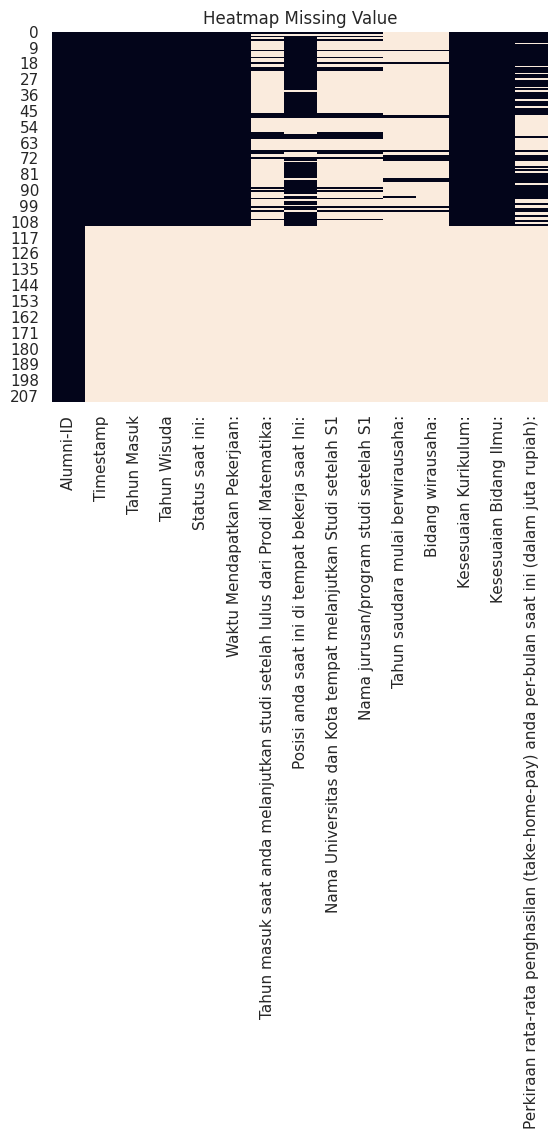

In [ ]:
sns.heatmap(dataset.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
(dataset.isnull().sum()/len(dataset)).to_frame('persentase missing')

,persentase missing
Alumni-ID,0.000000
Timestamp,0.476190
Tahun Masuk,0.476190
Tahun Wisuda,0.476190
Status saat ini:,0.476190
Waktu Mendapatkan Pekerjaan:,0.476190
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,0.885714
Posisi anda saat ini di tempat bekerja saat Ini:,0.600000
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,0.885714
Nama jurusan/program studi setelah S1,0.885714


In [ ]:
dataset[dataset.isnull().any(axis=1)]

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,7/25/2023 9:55,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4
1,2,7/26/2023 10:10,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6
2,3,7/28/2023 2:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5
3,4,7/27/2023 14:27,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8
4,5,7/25/2023 9:44,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# perhatikan perintahnya tidak menggunakan tanda "()" ==> Properties
dataset.columns

Index(['Alumni-ID', 'Timestamp', 'Tahun Masuk', 'Tahun Wisuda',
       'Status saat ini:', 'Waktu Mendapatkan Pekerjaan:',
       'Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:',
       'Posisi anda saat ini di tempat bekerja saat Ini:',
       'Nama Universitas dan Kota tempat melanjutkan Studi setelah S1',
       'Nama jurusan/program studi setelah S1',
       'Tahun saudara mulai berwirausaha:', 'Bidang wirausaha:',
       'Kesesuaian Kurikulum:', 'Kesesuaian Bidang Ilmu:',
       'Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'],
      dtype='object')

In [ ]:
# tipe data di setiap kolom
# Wajib di periksa apakah tipe datanya sudah tepat?
# Perhatikan df sebagaimana semua variable di Python diperlakukan seperti object
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Alumni-ID                                                                                     210 non-null    int64  
 1   Timestamp                                                                                     110 non-null    object 
 2   Tahun Masuk                                                                                   110 non-null    float64
 3   Tahun Wisuda                                                                                  110 non-null    float64
 4   Status saat ini:                                                                              110 non-null    object 
 5   Waktu Mendapatkan Pekerjaan: 

In [ ]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 11 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Tahun Masuk                                                                                   109 non-null    float64
 1   Tahun Wisuda                                                                                  109 non-null    float64
 2   Status saat ini:                                                                              109 non-null    object 
 3   Waktu Mendapatkan Pekerjaan:                                                                  109 non-null    object 
 4   Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                  24 non-null     object 
 5   Posisi anda saat ini di tempa

In [ ]:
#mengecek apakah ada duplikat data?
print(dataset2.shape)
dataset2.duplicated().sum()

(109, 11)


5

In [ ]:
#hapus duplikat
dataset3 = dataset2.drop_duplicates()

In [ ]:
#mengecek apakah ada duplikat data?
print(dataset3.shape)
dataset3.duplicated().sum()

(104, 11)


0

In [ ]:
# Memilih hanya variable dengan tipe tertentu
dataset_num = dataset3.select_dtypes(include = ['float64','int64'])
dataset_num.head()

,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,2004.0,2010.0,3.0,3.0
1,2015.0,2020.0,3.0,3.0
2,2000.0,2006.0,5.0,5.0
3,2014.0,2019.0,3.0,3.0
4,2013.0,2018.0,4.0,3.0


In [ ]:
# Memilih hanya variable dengan tipe tertentu
dataset_cat = dataset3.select_dtypes(include = ['object'])
dataset_cat.head()

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4
1,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,6
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5
3,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,8
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15


In [ ]:
#replace data yang diubah ke dataset
#fill atribut numeric dengan mean (rata-rata), atribut categorial dengan mode
atribut_kategorial=dataset3.select_dtypes(include=['object','category'])
atribut_numerik=dataset3.select_dtypes(include=['number'])
atribut_kategorial.fillna(atribut_kategorial.mode().iloc[0],inplace=True)
atribut_numerik.fillna(atribut_numerik.mean(),inplace=True)
dataset4=pd.concat([atribut_kategorial,atribut_numerik],axis=1)

In [ ]:
dataset4

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5,2000.0,2006.0,5.0,5.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


In [ ]:
#replace data yang diubah ke dataset
#fill atribut numeric dengan mean (rata-rata), atribut categorial dengan mode
atribut_kategorial=dataset3.select_dtypes(include=['object'])
atribut_numerik=dataset3.select_dtypes(include='number')
atribut_kategorial.fillna(atribut_kategorial.mode().iloc[0],inplace=True)
atribut_numerik.fillna(atribut_numerik.mean(),inplace=True)
dataset4=pd.concat([atribut_kategorial,atribut_numerik],axis=1)

In [ ]:
dataset4

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5,2000.0,2006.0,5.0,5.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


In [ ]:
dataset4.isnull().sum()

Status saat ini:                                                                                0
Waktu Mendapatkan Pekerjaan:                                                                    0
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    0
Posisi anda saat ini di tempat bekerja saat Ini:                                                0
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   0
Nama jurusan/program studi setelah S1                                                           0
Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):    0
Tahun Masuk                                                                                     0
Tahun Wisuda                                                                                    0
Kesesuaian Kurikulum:                                                                           0
Kesesuaian Bidang Il

In [ ]:
# Saving the preprocessed Data for future use/analysis
dataset4=dataset4

In [ ]:
dataset4

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
2,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,5,2000.0,2006.0,5.0,5.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


In [ ]:
dataset4.describe()

,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
count,104.000000,104.000000,104.000000,104.000000
mean,2013.826923,2018.692308,3.875000,3.548077
std,4.870044,4.989459,0.899703,1.069251
min,2000.000000,2006.000000,1.000000,1.000000
25%,2011.000000,2016.000000,3.000000,3.000000
50%,2016.000000,2021.000000,4.000000,4.000000
75%,2017.000000,2022.000000,5.000000,4.000000
max,2019.000000,2023.000000,5.000000,5.000000


In [ ]:
# Statistika Sederhana dari data "Numerik"-nya
dataset4.describe(include='all')

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
count,104,104,104,104,104,104,104,104.000000,104.000000,104.000000,104.000000
unique,11,7,14,73,17,15,21,NaN,NaN,NaN,NaN
top,Karyawan Swasta,Kurang dari 3 bulan.,-,-,-,-,6,NaN,NaN,NaN,NaN
freq,69,60,86,25,86,86,55,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.826923,2018.692308,3.875000,3.548077
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.870044,4.989459,0.899703,1.069251
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.000000,2006.000000,1.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,2016.000000,3.000000,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,2021.000000,4.000000,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,2022.000000,5.000000,4.000000


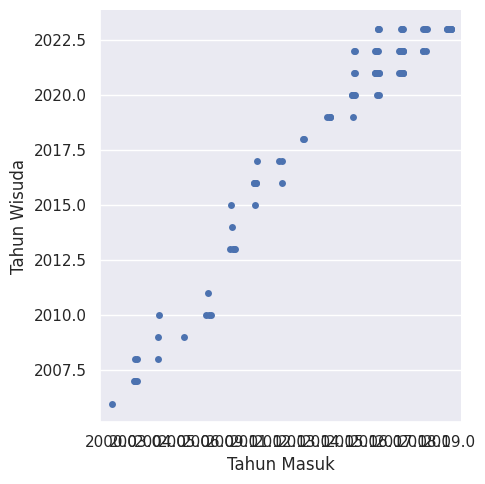

In [ ]:
p= sns.catplot(x="Tahun Masuk", y="Tahun Wisuda", data= dataset4)
# Apa yang bisa dilihat dari hasil ini?

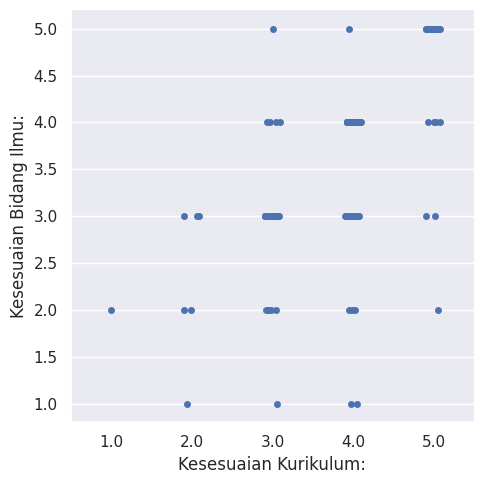

In [ ]:
p= sns.catplot(x="Kesesuaian Kurikulum:", y="Kesesuaian Bidang Ilmu:", data= dataset4)
# Apa yang bisa dilihat dari hasil ini?

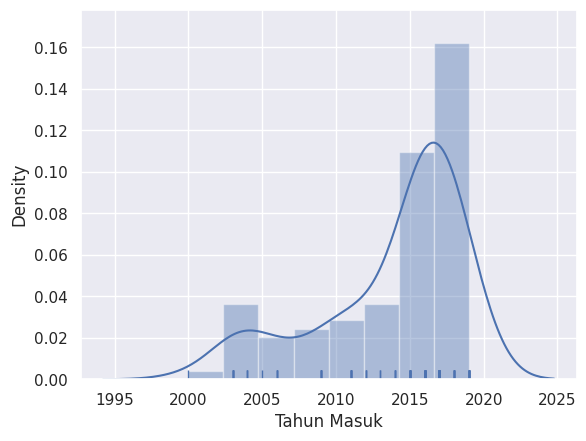

In [ ]:
# Distributions
p = sns.distplot(dataset4['Tahun Masuk'], kde=True, rug=True)

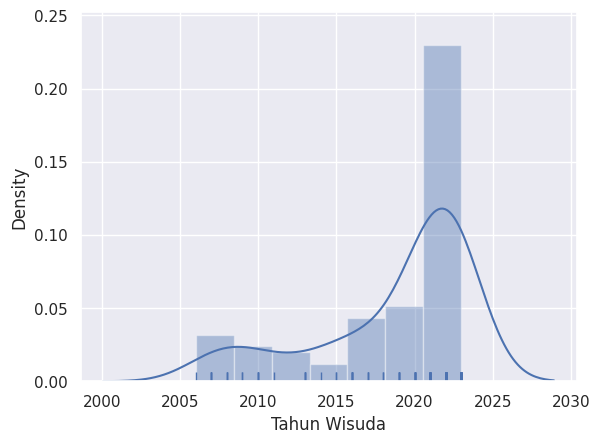

In [ ]:
# Distributions
p = sns.distplot(dataset4['Tahun Wisuda'], kde=True, rug=True)

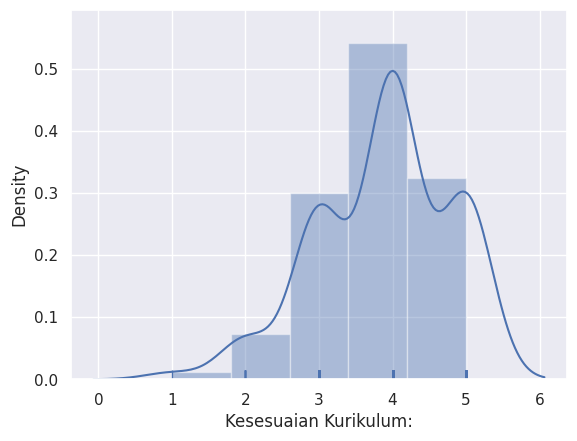

In [ ]:
# Distributions
p = sns.distplot(dataset4['Kesesuaian Kurikulum:'], kde=True, rug=True)

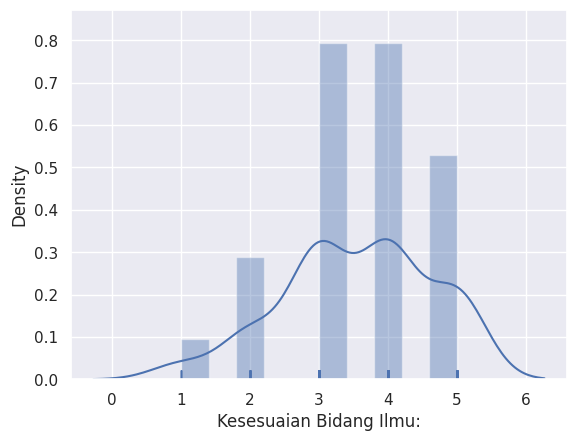

In [ ]:
# Distributions
p = sns.distplot(dataset4['Kesesuaian Bidang Ilmu:'], kde=True, rug=True)

<function matplotlib.pyplot.show(close=None, block=None)>

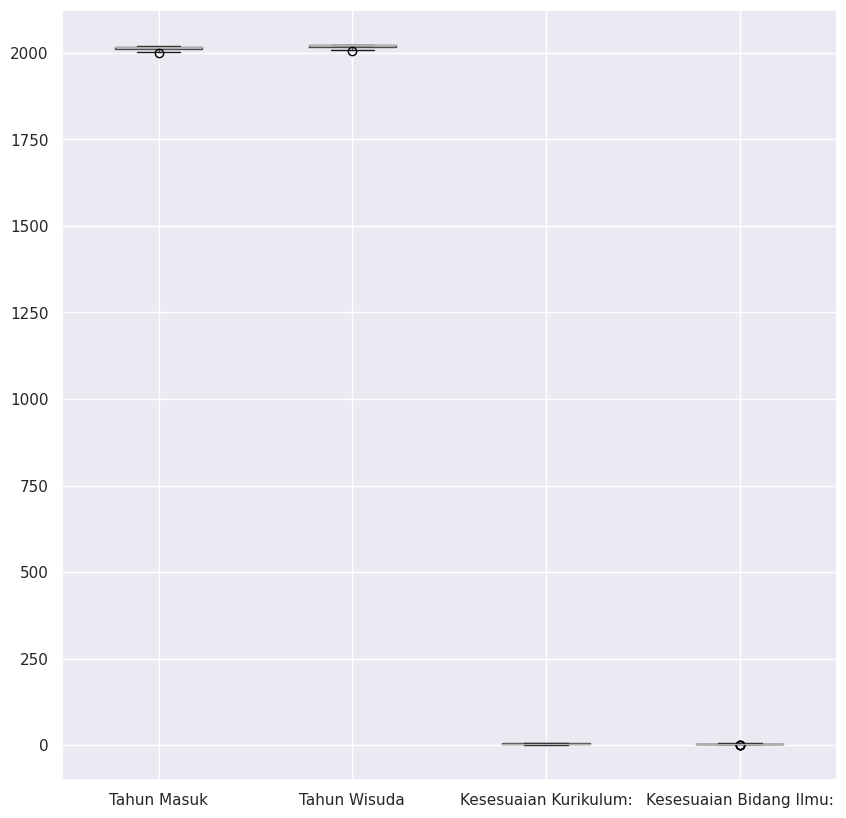

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset4.boxplot()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

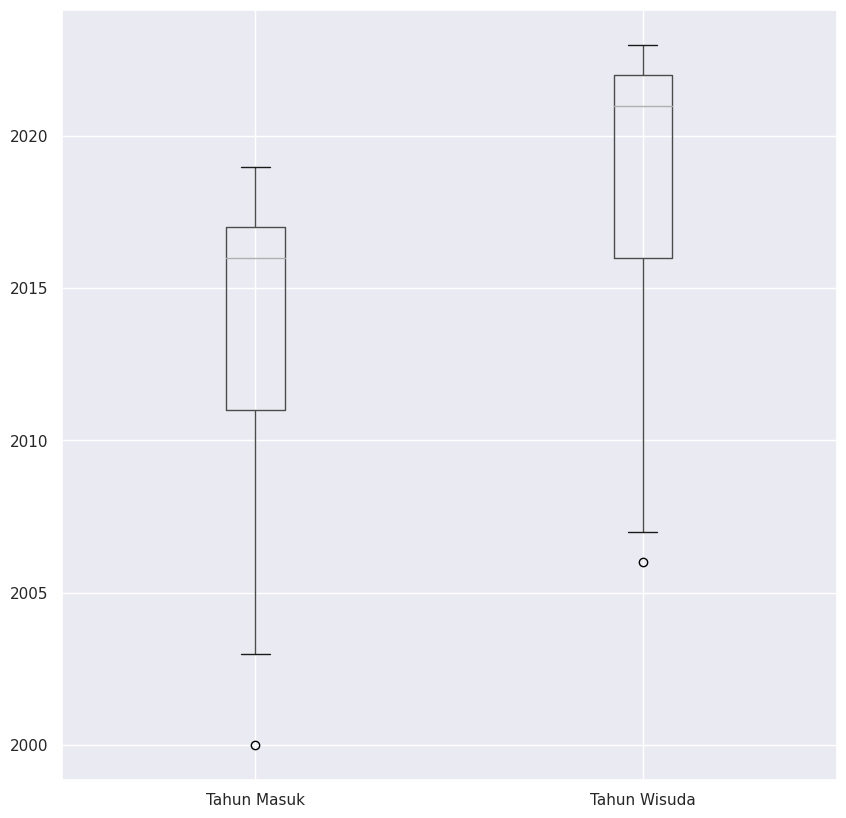

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset4.boxplot(column=['Tahun Masuk','Tahun Wisuda'])
plt.show

In [ ]:
Q1 = dataset4['Tahun Masuk'].quantile(0.25)
Q2 = dataset4['Tahun Masuk'].quantile(0.50)
Q3 = dataset4['Tahun Masuk'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset4['Tahun Masuk'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset4['Tahun Masuk'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Angkatan Lama = dataset4.loc[outliers_bawah]
#Angkatan Baru  = dataset4.loc[outliers_atas]

dataset_no_outlier1 =dataset4[(dataset4['Tahun Masuk'] > Q1 - 1.5 * IQR) & (dataset4['Tahun Masuk'] < Q3 + 1.5 *IQR)]
dataset_no_outlier1

Q1=2011.0, Q3=2017.0, IQR=6.0


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
5,Karyawan Swasta,Kurang dari 3 bulan.,-,Account Payable Accountant,-,-,6,2019.0,2023.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

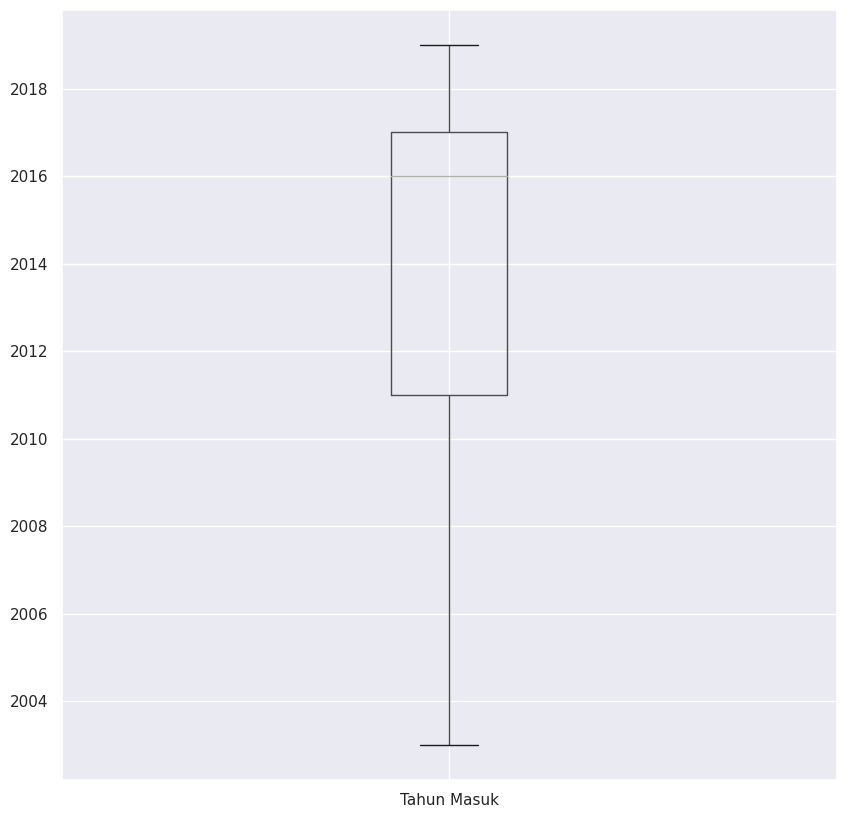

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset_no_outlier1.boxplot(column=['Tahun Masuk'])
plt.show

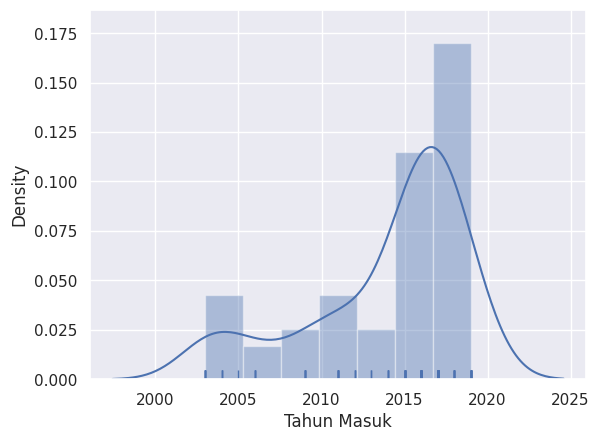

In [ ]:
# Distributions
p = sns.distplot(dataset_no_outlier1['Tahun Masuk'], kde=True, rug=True)

In [ ]:
Q1 = dataset_no_outlier1['Tahun Wisuda'].quantile(0.25)
Q2 = dataset_no_outlier1['Tahun Wisuda'].quantile(0.50)
Q3 = dataset_no_outlier1['Tahun Wisuda'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset4['Tahun Wisuda'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset4['Tahun Wisuda'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Wisuda lama = dataset4.loc[outliers_bawah]
#wisuda baru = dataset4.loc[outliers_atas]

dataset_no_outlier2 =dataset_no_outlier1[(dataset_no_outlier1['Tahun Wisuda'] >= Q1 - 1.5 * IQR) & (dataset_no_outlier1['Tahun Wisuda'] <= Q3 + 1.5 *IQR)]
dataset_no_outlier2

Q1=2016.0, Q3=2022.0, IQR=6.0


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
5,Karyawan Swasta,Kurang dari 3 bulan.,-,Account Payable Accountant,-,-,6,2019.0,2023.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

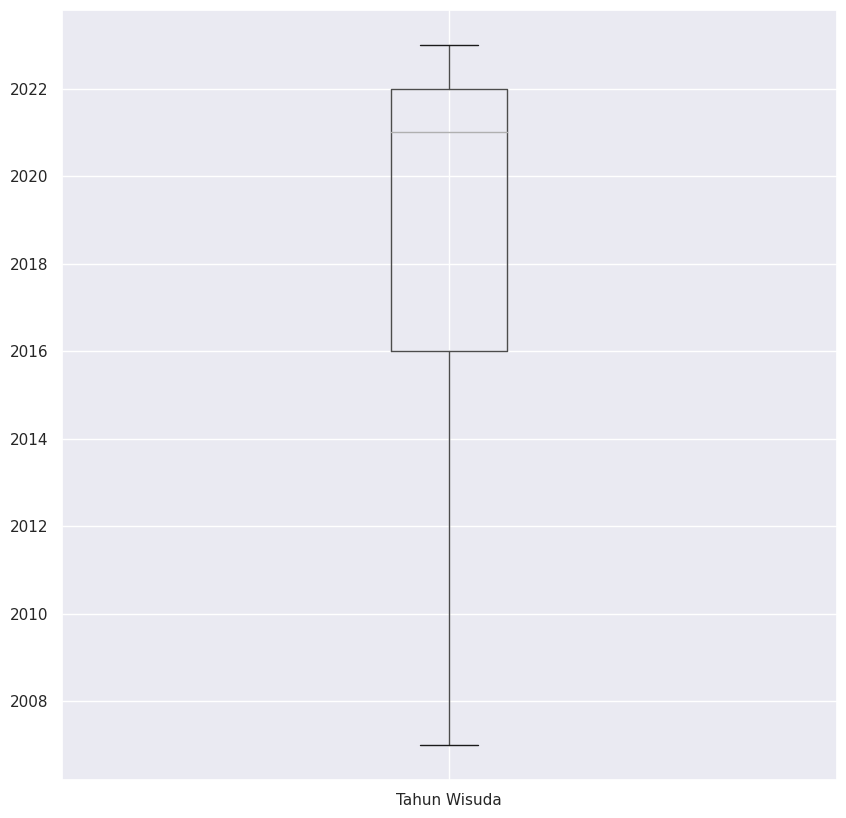

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset_no_outlier2.boxplot(column=['Tahun Wisuda'])
plt.show

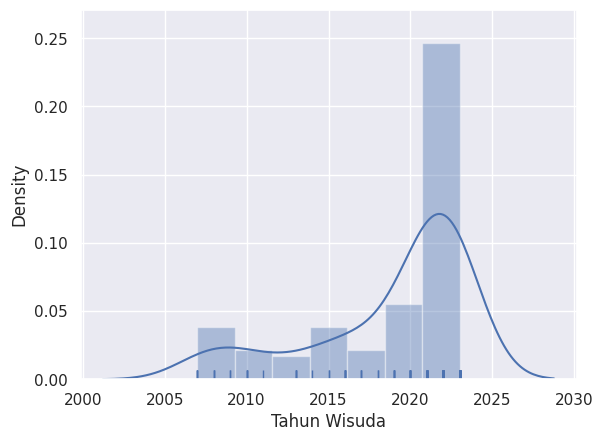

In [ ]:
# Distributions
p = sns.distplot(dataset_no_outlier2['Tahun Wisuda'], kde=True, rug=True)

In [ ]:
Q1 = dataset_no_outlier2['Kesesuaian Kurikulum:'].quantile(0.25)
Q2 = dataset_no_outlier2['Kesesuaian Kurikulum:'].quantile(0.50)
Q3 = dataset_no_outlier2['Kesesuaian Kurikulum:'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset4['Kesesuaian Kurikulum:'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset4['Kesesuaian Kurikulum:'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Kurikulum tidak sesuai = dataset4.loc[outliers_bawah]
#Kurikulum sesuai= dataset4.loc[outliers_atas]

dataset_no_outlier3= dataset_no_outlier2[(dataset_no_outlier2['Kesesuaian Kurikulum:'] >= Q1 - 1.5 * IQR) & (dataset_no_outlier2['Kesesuaian Kurikulum:'] <= Q3 + 1.5 *IQR)]
dataset_no_outlier3

Q1=3.0, Q3=4.5, IQR=1.5


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
5,Karyawan Swasta,Kurang dari 3 bulan.,-,Account Payable Accountant,-,-,6,2019.0,2023.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

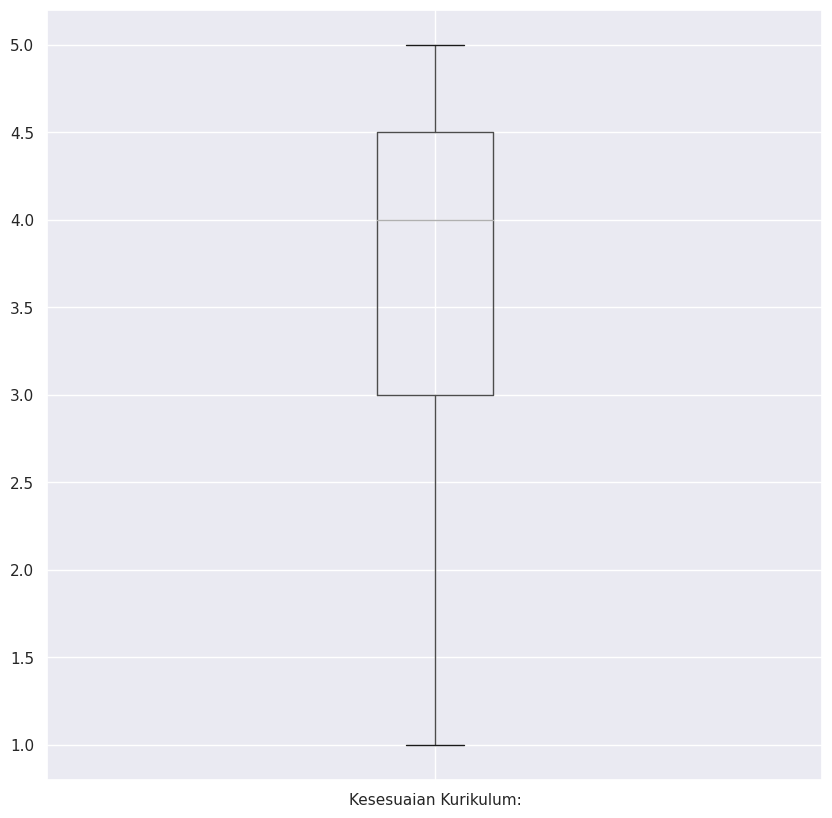

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset_no_outlier3.boxplot(column=['Kesesuaian Kurikulum:'])
plt.show

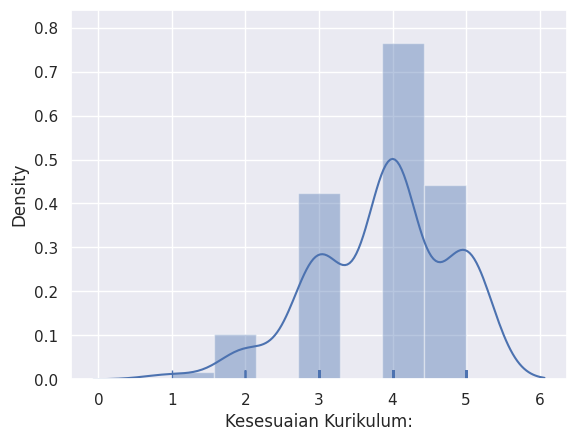

In [ ]:
# Distributions
p = sns.distplot(dataset_no_outlier3['Kesesuaian Kurikulum:'], kde=True, rug=True)

In [ ]:
Q1 = dataset_no_outlier3['Kesesuaian Bidang Ilmu:'].quantile(0.25)
Q2 = dataset_no_outlier3['Kesesuaian Bidang Ilmu:'].quantile(0.50)
Q3 = dataset_no_outlier3['Kesesuaian Bidang Ilmu:'].quantile(0.75)
IQR = Q3 - Q1 #IQR is interquartile range.
print("Q1={}, Q3={}, IQR={}".format(Q1, Q3, IQR))

#outliers_bawah = dataset4['Kesesuaian Kurikulum:'] < (Q1 - 1.5 *IQR)) # Outlier bawah
#outliers_atas = dataset4['Kesesuaian Kurikulum:'] > (Q3 + 1.5 *IQR)) # Outlier atas
#Bidang Ilmu tidak sesuai = dataset4.loc[outliers_bawah]
#Bidang Ilmu sesuai= dataset4.loc[outliers_atas]

dataset_no_outlier4 = dataset_no_outlier3[(dataset_no_outlier3['Kesesuaian Bidang Ilmu:'] >= Q1 - 1.5 * IQR) & (dataset_no_outlier3['Kesesuaian Bidang Ilmu:'] <= Q3 + 1.5 *IQR)]
dataset_no_outlier4

Q1=3.0, Q3=4.0, IQR=1.0


,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
6,Karyawan Swasta,Kurang dari 3 bulan.,-,Category Management,-,-,6,2009.0,2013.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

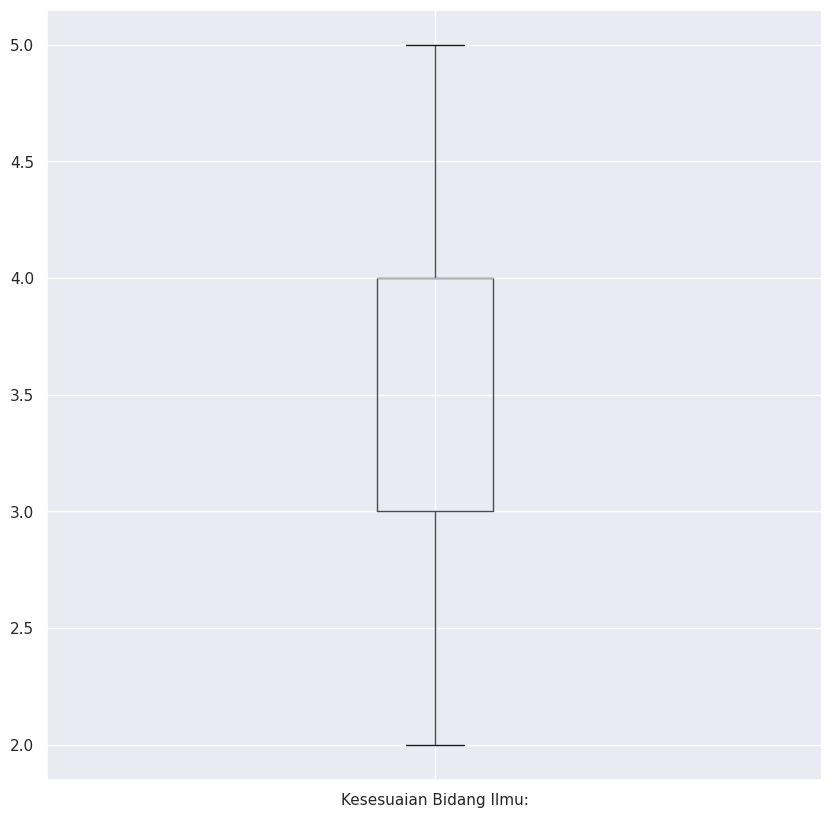

In [ ]:
#Find Outliner
plt.figure(figsize=(10,10))
dataset_no_outlier4.boxplot(column='Kesesuaian Bidang Ilmu:')
plt.show

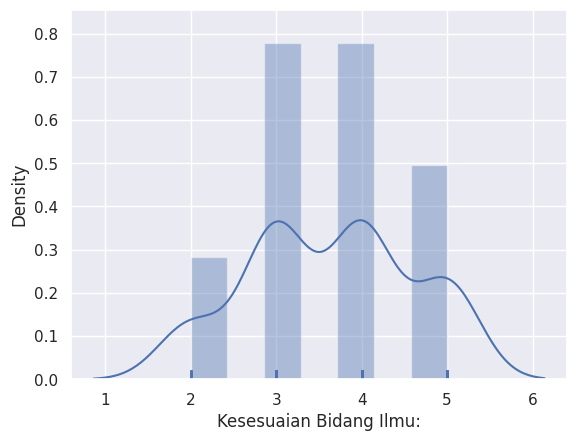

In [ ]:
# Distributions
p = sns.distplot(dataset_no_outlier4['Kesesuaian Bidang Ilmu:'], kde=True, rug=True)

In [ ]:
dataset5=dataset_no_outlier4

In [ ]:
dataset5

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4,2004.0,2010.0,3.0,3.0
1,ASN/PNS,6-12 bulan,-,-,-,-,6,2015.0,2020.0,3.0,3.0
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8,2014.0,2019.0,3.0,3.0
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15,2013.0,2018.0,4.0,3.0
6,Karyawan Swasta,Kurang dari 3 bulan.,-,Category Management,-,-,6,2009.0,2013.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
104,Karyawan Swasta,6-12 bulan,-,Finance Staff,-,-,4,2015.0,2020.0,4.0,2.0
105,Karyawan Swasta,Kurang dari 3 bulan.,-,Administrasi HR Database,-,-,6,2017.0,2023.0,4.0,4.0
106,Karyawan Swasta,Kurang dari 3 bulan.,2018,AI & Data Analytics,Universitas Indonesia,Matematika,6,2011.0,2016.0,4.0,4.0
107,Karyawan Swasta,6-12 bulan,-,Assistant,-,-,"4,5",2016.0,2021.0,3.0,3.0


In [ ]:
dataset5.isnull().sum()

Status saat ini:                                                                                0
Waktu Mendapatkan Pekerjaan:                                                                    0
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                    0
Posisi anda saat ini di tempat bekerja saat Ini:                                                0
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                   0
Nama jurusan/program studi setelah S1                                                           0
Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):    0
Tahun Masuk                                                                                     0
Tahun Wisuda                                                                                    0
Kesesuaian Kurikulum:                                                                           0
Kesesuaian Bidang Il

In [ ]:
dataset_cat1 = dataset5.select_dtypes(include = ['object'])
dataset_cat1.head()

,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,4
1,ASN/PNS,6-12 bulan,-,-,-,-,6
3,karyawan BUMN,6-12 bulan,-,Officer HC Solution Analysis Support,-,-,8
4,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,15
6,Karyawan Swasta,Kurang dari 3 bulan.,-,Category Management,-,-,6


In [ ]:
dataset_num1 = dataset5.select_dtypes(include = ['float64','int64'])
dataset_num1.head()

,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
0,2004.0,2010.0,3.0,3.0
1,2015.0,2020.0,3.0,3.0
3,2014.0,2019.0,3.0,3.0
4,2013.0,2018.0,4.0,3.0
6,2009.0,2013.0,3.0,2.0


Status saat ini:                                                                                 object
Waktu Mendapatkan Pekerjaan:                                                                     object
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:                     object
Posisi anda saat ini di tempat bekerja saat Ini:                                                 object
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1                                    object
Nama jurusan/program studi setelah S1                                                            object
Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):     object
Tahun Masuk                                                                                     float64
Tahun Wisuda                                                                                    float64
Kesesuaian Kurikulum:                                           

In [ ]:
#mengecek apakah ada duplikat data?
print(dataset5.shape)
dataset5.duplicated().sum()

(99, 11)


1

In [ ]:
#hapus duplikat
dataset6 = dataset5.drop_duplicates()
#mengecek apakah ada duplikat data?
print(dataset6.shape)
dataset6.duplicated().sum()

(98, 11)


0

In [ ]:
dataset6.describe()

,Tahun Masuk,Tahun Wisuda,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:
count,98.000000,98.000000,98.000000,98.000000
mean,2014.000000,2018.857143,3.877551,3.622449
std,4.597175,4.747218,0.888243,0.947218
min,2003.000000,2007.000000,1.000000,2.000000
25%,2011.250000,2016.250000,3.000000,3.000000
50%,2016.000000,2021.000000,4.000000,4.000000
75%,2017.000000,2022.000000,4.750000,4.000000
max,2019.000000,2023.000000,5.000000,5.000000
